# Examining Deaths and the "Booster" for COVID-19 in Israel and the USA

The Israeli Ministry of Health (MOH) produced data which is displated on the dashboard about deaths according to vaccine status. We will process this data, as well as datasets about the USA, to awnser  some questions about what we might expect in different scenarios in the USA. 

The first thing we want to do is verify that the vaccine booster does in fact work. Our lab has a paper coming out on this very issue, however the publiication of the data may not happen due to patient privacy concerns. Obviously, one of the best ways we could check now that we have data would be a retrospective case-control which took into account various statistical confounders. We expect some statistical confounding between those who got boosters and those who did not. Based on public information ffrom the Israeli MOH we have the ages of vaccinated people as they vaccinate or boost their vaccine, but no other confounders. Still we can take a look at the data, and see if it supports the idea that the booster works, before applying an efficacy number based on data we can not show.   

## Libraries and datasets

In [1]:
# import libraries 
import subprocess
import logging

# imported libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# import data

deaths = pd.read_csv('D:/MAXCORlabwork/covid/most_current_csvs/daily_deaths_with_vaccine_status_redownload.csv')
#deaths = pd.read_csv('D:/MAXCORlabwork/covid/most_current_csvs/daily_deaths_with_vaccine_status.csv')

In [3]:
deaths.head(5)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,?????,????? ???,?????? ???????,?????? ??????? ??? ????,?????? ?? ???????,?????? ??????? ?-100 ??? ??????,?????? ??????? ??? ???? ?-100 ??? ??????,?????? ?? ??????? ?-100 ??? ??????
1,17-01-2021,??? ?????????,0,0,30,0,0,0.4
2,17-01-2021,??? ??? 60,0,0,25,0,0,5.3
3,17-01-2021,???? ???? 60,0,0,5,0,0,0.1
4,18-01-2021,??? ?????????,0,0,26,0,0,0.4


In [4]:
len(deaths)

910

In [5]:
deaths = deaths.rename(
    columns={'Unnamed: 0': 'date',
             'Unnamed: 1' : 'age_group',
            'Unnamed: 2' : 'dead_vaccinated',
            'Unnamed: 3' : 'dead_vaccinations_expired',
            'Unnamed: 4' : 'dead_no_vaccine',
            'Unnamed: 5' : 'dead_vaccinated_per_100K',
            'Unnamed: 6' : 'dead_vaccinations_expired_per_100K',
            'Unnamed: 7' : 'dead_no_vaccine_per_100K',})

In [6]:
deaths.head(4)

,date,age_group,dead_vaccinated,dead_vaccinations_expired,dead_no_vaccine,dead_vaccinated_per_100K,dead_vaccinations_expired_per_100K,dead_no_vaccine_per_100K
0,?????,????? ???,?????? ???????,?????? ??????? ??? ????,?????? ?? ???????,?????? ??????? ?-100 ??? ??????,?????? ??????? ??? ???? ?-100 ??? ??????,?????? ?? ??????? ?-100 ??? ??????
1,17-01-2021,??? ?????????,0,0,30,0,0,0.4
2,17-01-2021,??? ??? 60,0,0,25,0,0,5.3
3,17-01-2021,???? ???? 60,0,0,5,0,0,0.1


In [7]:
deaths.dead_no_vaccine_per_100K.unique()

array(['?????? ?? ??????? ?-100 ??? ??????', '0.4', '5.3', '0.1', '3.9',
       '4.6', '0.3', '0', '0.5', '7.5', '6.5', '0.6', '8.4', '5.9', '7.2',
       '8.2', '6.2', '6.6', '6.4', '3', '5.5', '4.8', '6.1', '4.2', '6.7',
       '4.1', '0.2', '2.8', '4.5', '4.9', '5.8', '3.6', '5.6', '3.1',
       '3.8', '2', '7.7', '3.5', '4.3', '2.9', '5.2', '3.3', '2.1', '2.6',
       '2.2', '4.4', '0.9', '2.7', '1.8', '4', '5', '1.4', '2.3', '1.9',
       '2.4', '1', '1.5', '1.2', '2.5', '3.7', '6.3', '3.2', '7.8',
       '11.4', '9.4', '9.5', '8.8', '0.7', '13.6', '6.8', '7.6', '13.2',
       '9.8', '7', '8.5', '7.1', '7.9', '7.3', '8.1', '6', '6.9', '0.8',
       '4.7', '1.6'], dtype=object)

In [8]:
deaths.dead_vaccinations_expired_per_100K.unique()

array(['?????? ??????? ??? ???? ?-100 ??? ??????', '0', '0.6', '0.5',
       '0.1', '0.2', '0.4', '0.7', '1.5', '0.9', '1.8', '1.2', '1.4',
       '1.9', '0.8', '1.6', '2.4', '3.5', '1.3', '5.6', '5.2', '1.1',
       '4.6', '4.2', '3.7', '5.7', '1', '6.5', '6.1', '4.9', '7', '8.8',
       '6.3', '7.4', '7.3', '6.7', '10.8', '4.1', '1.7', '0.3', '2.5',
       '3.3', '3.9', '3.1', '2.3', '3.6', '2.7', '2.8', '2.9'],
      dtype=object)

In [9]:
len(deaths.dead_vaccinations_expired_per_100K[deaths.dead_vaccinations_expired_per_100K != '0'])

210

In [10]:
len(deaths.dead_vaccinations_expired_per_100K[deaths.dead_vaccinations_expired_per_100K != '0'])

210

In [11]:
len(deaths)

910

OK, we can already see that there has been a lot of rounding in the numbers per 100K population, so to be exact we should just use the raw numbers, and we can do it per population group. Unfortunately, we don't know what numbers the Ministry of Health used for population groups, therefore we will take a short-cut and use thier numbers which are rounded (we only want to get a sense that the vaccine-booster worker, not an exact number)  

In [12]:
#deaths = deaths.iloc[1:541]
deaths.head(5)

,date,age_group,dead_vaccinated,dead_vaccinations_expired,dead_no_vaccine,dead_vaccinated_per_100K,dead_vaccinations_expired_per_100K,dead_no_vaccine_per_100K
0,?????,????? ???,?????? ???????,?????? ??????? ??? ????,?????? ?? ???????,?????? ??????? ?-100 ??? ??????,?????? ??????? ??? ???? ?-100 ??? ??????,?????? ?? ??????? ?-100 ??? ??????
1,17-01-2021,??? ?????????,0,0,30,0,0,0.4
2,17-01-2021,??? ??? 60,0,0,25,0,0,5.3
3,17-01-2021,???? ???? 60,0,0,5,0,0,0.1
4,18-01-2021,??? ?????????,0,0,26,0,0,0.4


Now we only want to deal with dates where the issue of the booster is relevant. So we will slice the dataframe again so we start on July 1st 2021. 

In [13]:
deaths.columns

Index(['date', 'age_group', 'dead_vaccinated', 'dead_vaccinations_expired',
       'dead_no_vaccine', 'dead_vaccinated_per_100K',
       'dead_vaccinations_expired_per_100K', 'dead_no_vaccine_per_100K'],
      dtype='object')

In [14]:
len(deaths)

910

In [15]:
deaths.dead_vaccinations_expired_per_100K.unique()

array(['?????? ??????? ??? ???? ?-100 ??? ??????', '0', '0.6', '0.5',
       '0.1', '0.2', '0.4', '0.7', '1.5', '0.9', '1.8', '1.2', '1.4',
       '1.9', '0.8', '1.6', '2.4', '3.5', '1.3', '5.6', '5.2', '1.1',
       '4.6', '4.2', '3.7', '5.7', '1', '6.5', '6.1', '4.9', '7', '8.8',
       '6.3', '7.4', '7.3', '6.7', '10.8', '4.1', '1.7', '0.3', '2.5',
       '3.3', '3.9', '3.1', '2.3', '3.6', '2.7', '2.8', '2.9'],
      dtype=object)

In [16]:
deaths_raw_numbers = deaths.iloc[347:866, 0:5]
deaths_per_100k = deaths.iloc[347:866, 0:]
deaths_per_100k = deaths_per_100k.drop(['dead_vaccinated','dead_vaccinations_expired','dead_no_vaccine'], axis=1)
deaths_per_100k.head(5)

,date,age_group,dead_vaccinated_per_100K,dead_vaccinations_expired_per_100K,dead_no_vaccine_per_100K
347,12-05-2021,???? ???? 60,0,0,0
348,12-05-2021,??? ??? 60,0,0,0
349,13-05-2021,???? ???? 60,0,0,0.1
350,13-05-2021,??? ?????????,0,0,0.1
351,13-05-2021,??? ??? 60,0,0,0


In [17]:
deaths_per_100k.date.unique()

array(['12-05-2021', '13-05-2021', '14-05-2021', '15-05-2021',
       '16-05-2021', '17-05-2021', '18-05-2021', '19-05-2021',
       '20-05-2021', '21-05-2021', '22-05-2021', '23-05-2021',
       '24-05-2021', '25-05-2021', '26-05-2021', '27-05-2021',
       '28-05-2021', '29-05-2021', '30-05-2021', '31-05-2021',
       '01-06-2021', '02-06-2021', '03-06-2021', '04-06-2021',
       '05-06-2021', '06-06-2021', '07-06-2021', '08-06-2021',
       '09-06-2021', '10-06-2021', '11-06-2021', '12-06-2021',
       '13-06-2021', '14-06-2021', '15-06-2021', '16-06-2021',
       '17-06-2021', '18-06-2021', '19-06-2021', '20-06-2021',
       '21-06-2021', '22-06-2021', '23-06-2021', '24-06-2021',
       '25-06-2021', '26-06-2021', '27-06-2021', '28-06-2021',
       '29-06-2021', '30-06-2021', '01-07-2021', '02-07-2021',
       '03-07-2021', '04-07-2021', '05-07-2021', '06-07-2021',
       '07-07-2021', '08-07-2021', '09-07-2021', '10-07-2021',
       '11-07-2021', '12-07-2021', '13-07-2021', '14-07

In [18]:
#HERE IT WIPES out the below column- why????

In [19]:
deaths_per_100k.dead_vaccinations_expired_per_100K.unique()

array(['0', '0.6', '0.5', '0.1', '0.2', '0.4', '0.7', '1.5', '0.9', '1.8',
       '1.2', '1.4', '1.9', '0.8', '1.6', '2.4', '3.5', '1.3', '5.6',
       '5.2', '1.1', '4.6', '4.2', '3.7', '5.7', '1', '6.5', '6.1', '4.9',
       '7', '8.8', '6.3', '7.4', '7.3', '6.7', '10.8', '4.1', '1.7',
       '0.3', '2.5', '3.3', '3.9', '3.1', '2.3', '3.6', '2.7', '2.8'],
      dtype=object)

In [20]:
deaths_per_100k.tail(25)

,date,age_group,dead_vaccinated_per_100K,dead_vaccinations_expired_per_100K,dead_no_vaccine_per_100K
841,24-10-2021,??? ?????????,0,0.1,0.1
842,24-10-2021,???? ???? 60,0,0,0
843,24-10-2021,??? ??? 60,0,1,2.4
844,25-10-2021,???? ???? 60,0,0,0
845,25-10-2021,??? ??? 60,0.1,1.9,4.7
846,25-10-2021,??? ?????????,0,0.2,0.2
847,26-10-2021,???? ???? 60,0,0,0
848,26-10-2021,??? ?????????,0,0.2,0.2
849,26-10-2021,??? ??? 60,0.1,1.9,4.7
850,27-10-2021,??? ?????????,0,0,0.1


According to lab policy, we don't use very fresh data, as it could change. Therefore we will cut off data during the last month (November)

In [21]:
deaths_per_100k = deaths_per_100k.iloc[0:863, 0:].copy(deep= True)
deaths_per_100k

,date,age_group,dead_vaccinated_per_100K,dead_vaccinations_expired_per_100K,dead_no_vaccine_per_100K
347,12-05-2021,???? ???? 60,0,0,0
348,12-05-2021,??? ??? 60,0,0,0
349,13-05-2021,???? ???? 60,0,0,0.1
350,13-05-2021,??? ?????????,0,0,0.1
351,13-05-2021,??? ??? 60,0,0,0
...,...,...,...,...,...
861,30-10-2021,??? ??? 60,0,0,0.8
862,31-10-2021,??? ?????????,0,0.1,0
863,31-10-2021,???? ???? 60,0,0,0
864,31-10-2021,??? ??? 60,0,1,0.8


Now we have a dataframe cut to legitamate info on who died. 
We can now filter for age group during our calculations.
But we have one final step, turining strings into numbers where we need them. 

In [22]:
deaths_per_100k

,date,age_group,dead_vaccinated_per_100K,dead_vaccinations_expired_per_100K,dead_no_vaccine_per_100K
347,12-05-2021,???? ???? 60,0,0,0
348,12-05-2021,??? ??? 60,0,0,0
349,13-05-2021,???? ???? 60,0,0,0.1
350,13-05-2021,??? ?????????,0,0,0.1
351,13-05-2021,??? ??? 60,0,0,0
...,...,...,...,...,...
861,30-10-2021,??? ??? 60,0,0,0.8
862,31-10-2021,??? ?????????,0,0.1,0
863,31-10-2021,???? ???? 60,0,0,0
864,31-10-2021,??? ??? 60,0,1,0.8


In [23]:
deaths_per_100k['dead_vaccinated_per_100K'] = pd.to_numeric(deaths_per_100k['dead_vaccinated_per_100K'])
#deaths_per_100k
deaths_per_100k['dead_vaccinations_expired_per_100K'] = pd.to_numeric(deaths_per_100k['dead_vaccinations_expired_per_100K'])
deaths_per_100k['dead_no_vaccine_per_100K'] = pd.to_numeric(deaths_per_100k['dead_no_vaccine_per_100K'])

Now if we want to understand this we also need to know how many people were vaccinated, when. So we need to pull in our vaccination data

In [24]:
vaccination = pd.read_csv('D:/MAXCORlabwork/covid/most_current_csvs/vaccinated-per-day-2021-11-06.csv')

In [25]:
vaccination

,VaccinationDate,age_group,first_dose,second_dose,third_dose
0,2020-12-20,20-29,392,0,0
1,2020-12-20,0-19,21,0,0
2,2020-12-20,80-89,94,0,0
3,2020-12-20,60-69,1517,0,0
4,2020-12-20,50-59,1788,0,0
...,...,...,...,...,...
2875,2021-11-06,30-39,15,<15,61
2876,2021-11-06,40-49,<15,<15,32
2877,2021-11-06,60-69,<15,<15,<15
2878,2021-11-06,50-59,<15,<15,35


Now we need to slide and dice here for the dates, and we will decide that when they list less than 15 ("<15") we will round down to zero. We will then make numbers for people above and below 60, and the total population to match our dataset above. 

In [26]:
report_period = set(pd.date_range(
    vaccination['VaccinationDate'].min(),
    vaccination['VaccinationDate'].max(),
))

fill_back = {c: [] for c in vaccination.columns}

for category in vaccination['age_group'].unique():
    cat_records = vaccination[vaccination['age_group'] == category]
    cat_dates = set(pd.to_datetime(cat_records['VaccinationDate']))
    missing = report_period - cat_dates
    # print('Category: {} missing dates: {}'.format(category, missing))
    for m in missing:
        fill_back['VaccinationDate'].append(m.strftime('%Y-%m-%d'))
        fill_back['age_group'].append(category)
        fill_back['first_dose'].append('0')
        fill_back['second_dose'].append('0')
        fill_back['third_dose'].append('0')

fill_back_df = pd.DataFrame(fill_back)
vaccination_patched = pd.concat((vaccination, fill_back_df))
vaccination = vaccination_patched

In [27]:
vaccination['date_as_date'] = pd.to_datetime(vaccination['VaccinationDate'], format= '%Y-%m-%d')
# the other numeric data was provided as strings. we willconvert the strings to number
# and we will conservatively claim that when the number is recorded as '<15' it can
# be rounded down to zero. we do not want to overestimate the vaccinated population
# we will return to this assumption later and run the numbers if we round up to compare
vaccination['first_dose'] = vaccination['first_dose'].str.replace('<15', '0')
vaccination['second_dose'] = vaccination['second_dose'].str.replace('<15', '0')
vaccination['third_dose'] = vaccination['third_dose'].str.replace('<15', '0')
vaccination['first_dose'] = pd.to_numeric(vaccination['first_dose'])
vaccination['second_dose'] = pd.to_numeric(vaccination['second_dose'])
vaccination['third_dose'] = pd.to_numeric(vaccination['third_dose'])

Let's get a cut close to only the dates we care about (July 1 to October 10, 2021):

In [28]:
vaccination = vaccination.iloc[1450:2835]
vaccination

,VaccinationDate,age_group,first_dose,second_dose,third_dose,date_as_date
1450,2021-05-30,20-29,403,475,0,2021-05-30
1451,2021-05-30,80-89,24,35,0,2021-05-30
1452,2021-05-30,50-59,158,157,0,2021-05-30
1453,2021-05-30,0-19,227,283,0,2021-05-30
1454,2021-05-30,40-49,230,273,0,2021-05-30
...,...,...,...,...,...,...
2830,2021-11-01,20-29,492,455,2082,2021-11-01
2831,2021-11-01,80-89,17,35,92,2021-11-01
2832,2021-11-01,50-59,121,123,577,2021-11-01
2833,2021-11-01,70-79,38,43,157,2021-11-01


Now we know our dates are included, let's start summing up by age, and we will cut the ends off the dataframe later

In [29]:
age_grouped_to19_vax = vaccination[vaccination.age_group == '0-19'].copy(deep = True)
age_grouped_to29_vax = vaccination[vaccination.age_group == '20-29'].copy(deep = True)
age_grouped_to39_vax = vaccination[vaccination.age_group == '30-39'].copy(deep = True)
age_grouped_to49_vax = vaccination[vaccination.age_group == '40-49'].copy(deep = True)
age_grouped_to59_vax = vaccination[vaccination.age_group == '50-59'].copy(deep = True)
age_grouped_to69_vax = vaccination[vaccination.age_group == '60-69'].copy(deep = True)
age_grouped_to79_vax = vaccination[vaccination.age_group == '70-79'].copy(deep = True)
age_grouped_to89_vax = vaccination[vaccination.age_group == '80-89'].copy(deep = True)
age_grouped_90plus_vax = vaccination[vaccination.age_group == '90+'].copy(deep = True)

In [30]:
age_grouped_to19_vax = age_grouped_to19_vax.drop('age_group', axis = 1)
age_grouped_to29_vax = age_grouped_to29_vax.drop('age_group', axis = 1)
age_grouped_to39_vax = age_grouped_to39_vax.drop('age_group', axis = 1)
age_grouped_to49_vax = age_grouped_to49_vax.drop('age_group', axis = 1)
age_grouped_to59_vax = age_grouped_to59_vax.drop('age_group', axis = 1)
age_grouped_to69_vax = age_grouped_to69_vax.drop('age_group', axis = 1)
age_grouped_to79_vax = age_grouped_to79_vax.drop('age_group', axis = 1)
age_grouped_to89_vax = age_grouped_to89_vax.drop('age_group', axis = 1)
age_grouped_90plus_vax= age_grouped_90plus_vax.drop('age_group', axis = 1)
#age_grouped_90plus_vax

In [31]:
age_grouped_to19_vax = age_grouped_to19_vax.drop('VaccinationDate', axis = 1)
age_grouped_to29_vax = age_grouped_to29_vax.drop('VaccinationDate', axis = 1)
age_grouped_to39_vax = age_grouped_to39_vax.drop('VaccinationDate', axis = 1)
age_grouped_to49_vax = age_grouped_to49_vax.drop('VaccinationDate', axis = 1)
age_grouped_to59_vax = age_grouped_to59_vax.drop('VaccinationDate', axis = 1)
age_grouped_to69_vax = age_grouped_to69_vax.drop('VaccinationDate', axis = 1)
age_grouped_to79_vax = age_grouped_to79_vax.drop('VaccinationDate', axis = 1)
age_grouped_to89_vax = age_grouped_to89_vax.drop('VaccinationDate', axis = 1)
age_grouped_90plus_vax= age_grouped_90plus_vax.drop('VaccinationDate', axis = 1)

In [32]:
age_grouped_to19_vax = age_grouped_to19_vax.rename(
    columns = {'first_dose':'first_dose_in_0to19',
                'second_dose': 'second_dose_in_0to19',
                  'third_dose' : 'third_dose_in_0to19'}
    )
age_grouped_to29_vax = age_grouped_to29_vax.rename(
    columns = {'first_dose':'first_dose_in_20to29',
                'second_dose': 'second_dose_in_20to29',
                  'third_dose': 'third_dose_in_20to29',}
    )
age_grouped_to39_vax = age_grouped_to39_vax.rename(
    columns = {'first_dose':'first_dose_in_30to39',
                'second_dose': 'second_dose_in_30to39',
                    'third_dose': 'third_dose_in_30to39',}
    )
age_grouped_to49_vax = age_grouped_to49_vax.rename(
    columns = {'first_dose':'first_dose_in_40to49',
                'second_dose': 'second_dose_in_40to49',
                  'third_dose': 'third_dose_in_40to49',}
    )
age_grouped_to59_vax = age_grouped_to59_vax.rename(
    columns = {'first_dose':'first_dose_in_50to59',
                'second_dose': 'second_dose_in_50to59',
                  'third_dose': 'third_dose_in_50to59'}
    )
age_grouped_to69_vax = age_grouped_to69_vax.rename(
    columns = {'first_dose':'first_dose_in_60to69',
                'second_dose': 'second_dose_in_60to69',
                  'third_dose': 'third_dose_in_60to69'}
    )
age_grouped_to79_vax = age_grouped_to79_vax.rename(
    columns = {'first_dose':'first_dose_in_70to79',
                'second_dose': 'second_dose_in_70to79',
                  'third_dose': 'third_dose_in_70to79'}
    )
age_grouped_to89_vax = age_grouped_to89_vax.rename(
    columns = {'first_dose':'first_dose_in_80to89',
                'second_dose': 'second_dose_in_80to89',
                  'third_dose': 'third_dose_in_80to89'}
    )
age_grouped_90plus_vax = age_grouped_90plus_vax.rename(
    columns = {'first_dose':'first_dose_in_90plus',
                'second_dose': 'second_dose_in_90plus',
                  'third_dose': 'third_dose_in_90plus'}
    )



In [33]:
vax_by_age = age_grouped_to19_vax.merge(age_grouped_to29_vax, on = 'date_as_date')
vax_by_age = vax_by_age.merge(age_grouped_to39_vax, on = 'date_as_date')
vax_by_age = vax_by_age.merge(age_grouped_to49_vax, on = 'date_as_date')
vax_by_age = vax_by_age.merge(age_grouped_to59_vax, on = 'date_as_date')
vax_by_age = vax_by_age.merge(age_grouped_to69_vax, on = 'date_as_date')
vax_by_age = vax_by_age.merge(age_grouped_to79_vax, on = 'date_as_date')
vax_by_age = vax_by_age.merge(age_grouped_to89_vax, on = 'date_as_date')
vax_by_age = vax_by_age.merge(age_grouped_90plus_vax, on = 'date_as_date')

In [34]:
vax_by_age

,first_dose_in_0to19,second_dose_in_0to19,third_dose_in_0to19,date_as_date,first_dose_in_20to29,second_dose_in_20to29,third_dose_in_20to29,first_dose_in_30to39,second_dose_in_30to39,third_dose_in_30to39,...,third_dose_in_60to69,first_dose_in_70to79,second_dose_in_70to79,third_dose_in_70to79,first_dose_in_80to89,second_dose_in_80to89,third_dose_in_80to89,first_dose_in_90plus,second_dose_in_90plus,third_dose_in_90plus
0,179,309,0,2021-05-31,490,520,0,442,496,0,...,0,42,60,0,0,18,0,0,0,0
1,192,290,0,2021-06-01,350,461,0,228,404,0,...,0,37,51,0,26,38,0,0,0,0
2,202,237,0,2021-06-02,443,418,0,264,333,0,...,0,40,48,0,15,26,0,0,0,0
3,492,223,0,2021-06-03,393,341,0,248,298,0,...,0,38,39,0,0,30,0,0,0,0
4,517,92,0,2021-06-04,99,124,0,124,151,0,...,0,0,20,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,896,1062,931,2021-10-26,582,311,2530,342,222,1935,...,437,43,39,267,19,23,159,0,0,48
139,798,1248,983,2021-10-27,560,387,2328,350,300,1722,...,384,45,56,233,43,41,148,0,25,68
140,753,1217,935,2021-10-28,615,481,2512,428,380,2114,...,399,37,43,229,20,35,105,0,0,49
141,294,508,460,2021-10-29,220,182,1121,155,156,1136,...,182,0,0,62,0,0,28,0,0,0


In [35]:
vax_by_age_over_60 = vax_by_age[['date_as_date',
                                 'second_dose_in_60to69',
                                 'second_dose_in_70to79',
                                 'second_dose_in_80to89',
                                 'second_dose_in_90plus',
                                 'third_dose_in_60to69',
                                 'third_dose_in_70to79',
                                 'third_dose_in_80to89',
                                 'third_dose_in_90plus',]]
vax_by_age_under_60 = vax_by_age[['date_as_date',
                                 'second_dose_in_0to19',
                                 'second_dose_in_20to29',
                                 'second_dose_in_30to39',
                                'second_dose_in_40to49',
                                'second_dose_in_50to59',
                                 'third_dose_in_0to19',
                                 'third_dose_in_20to29',
                                 'third_dose_in_30to39',
                                'third_dose_in_40to49',
                                'third_dose_in_50to59',
                                 ]]

In [36]:
vax_by_age_over_60['total_second_doses_over_60'] =  vax_by_age_over_60[
    'second_dose_in_60to69'] + vax_by_age_over_60[
    'second_dose_in_70to79']+ vax_by_age_over_60[
    'second_dose_in_80to89']+ vax_by_age_over_60[
    'second_dose_in_90plus']

D:\bin\anaconda3\envs\jupyter_environment\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [37]:
vax_by_age_over_60['total_third_doses_over_60'] =  vax_by_age_over_60[
    'third_dose_in_60to69'] + vax_by_age_over_60[
    'third_dose_in_70to79']+ vax_by_age_over_60[
    'third_dose_in_80to89']+ vax_by_age_over_60[
    'third_dose_in_90plus']

In [38]:
vax_by_age_over_60_full_spread = vax_by_age_over_60

In [39]:
vax_by_age_over_60_truncated = vax_by_age_over_60[['date_as_date','total_second_doses_over_60','total_third_doses_over_60']] 

The above code with vaccinations will help us see what kind of people got and did not get the third dose. If those who got it scew older, but also die less, we can be pretty sure the efffect of the booster is read. In case I'm asked to change to a more data-based evaluation, we would need real population numbers. We won't really evaluate the EXACT efficacy here for now. 

## Calculations

The first question we can ask, is how many people in each group died from July to the end of October. 

In [40]:
deaths_per_100k

,date,age_group,dead_vaccinated_per_100K,dead_vaccinations_expired_per_100K,dead_no_vaccine_per_100K
347,12-05-2021,???? ???? 60,0.0,0.0,0.0
348,12-05-2021,??? ??? 60,0.0,0.0,0.0
349,13-05-2021,???? ???? 60,0.0,0.0,0.1
350,13-05-2021,??? ?????????,0.0,0.0,0.1
351,13-05-2021,??? ??? 60,0.0,0.0,0.0
...,...,...,...,...,...
861,30-10-2021,??? ??? 60,0.0,0.0,0.8
862,31-10-2021,??? ?????????,0.0,0.1,0.0
863,31-10-2021,???? ???? 60,0.0,0.0,0.0
864,31-10-2021,??? ??? 60,0.0,1.0,0.8


In [41]:
deaths_per_100k.dead_vaccinations_expired_per_100K.unique()

array([ 0. ,  0.6,  0.5,  0.1,  0.2,  0.4,  0.7,  1.5,  0.9,  1.8,  1.2,
        1.4,  1.9,  0.8,  1.6,  2.4,  3.5,  1.3,  5.6,  5.2,  1.1,  4.6,
        4.2,  3.7,  5.7,  1. ,  6.5,  6.1,  4.9,  7. ,  8.8,  6.3,  7.4,
        7.3,  6.7, 10.8,  4.1,  1.7,  0.3,  2.5,  3.3,  3.9,  3.1,  2.3,
        3.6,  2.7,  2.8])

In [42]:
# let's look at the whole population
deaths_per_100k[deaths_per_100k.age_group == '??? ?????????'].sum()

date                                  13-05-202114-05-202115-05-202116-05-202117-05-...
age_group                             ??? ???????????? ???????????? ???????????? ???...
dead_vaccinated_per_100K                                                            7.3
dead_vaccinations_expired_per_100K                                                 42.3
dead_no_vaccine_per_100K                                                           25.0
dtype: object

In [43]:
deaths_per_100k[deaths_per_100k.age_group == '???? ???? 60'].sum()

date                                  12-05-202113-05-202114-05-202115-05-202116-05-...
age_group                             ???? ???? 60???? ???? 60???? ???? 60???? ???? ...
dead_vaccinated_per_100K                                                            0.0
dead_vaccinations_expired_per_100K                                                  3.0
dead_no_vaccine_per_100K                                                            3.2
dtype: object

In [44]:
deaths_per_100k[deaths_per_100k.age_group == '??? ??? 60'].sum()

date                                  12-05-202113-05-202114-05-202115-05-202116-05-...
age_group                             ??? ??? 60??? ??? 60??? ??? 60??? ??? 60??? ??...
dead_vaccinated_per_100K                                                           34.2
dead_vaccinations_expired_per_100K                                                245.9
dead_no_vaccine_per_100K                                                          488.5
dtype: object

Note we didn't bother changing the dates to the correct format, we aren't working with them here...We can notice a strange trend, vaccinations expired have more deaths than NO vaccinations in the whole population, but that trend is reversed above AND below age 60. I believe there is a problem with the original Ministry of Health dataset.  I downloaded it twice from the dashboard on seperate dates, and saw the same problem. Let's try downloading it directly, without saving it, and re-running it if this goes public (i.e. force json parsing or csv reading from an html link). 

In [45]:

#deaths = pd.read_csv('D:/MAXCORlabwork/covid/most_current_csvs/daily_deaths_with_vaccine_status_redownload.csv')

Ignoring this strange slitch , there are no OTHER surprises here. Most deaths were among the unvaccinated, least in the vaccinated, and the expired came out somewhere in the middle. But we have to understand the denominators to understand what any of this means. That's why we looked at per 100K population (the raw numbers show the same trend.) But hypothetically, if there were only a few vaccinated people, this would imply the vaccines were not working. We know most people were actually vaccinated, but let's look at this quantitatively...and to do this we need to understand the age difference if any between fully vaccinated, and vaccine expired.  

## Moving on...


There are several approaches we could take here. To be exactly precise we would need person-days in each category as this unfolded. As the situation unfolds people change categories, so knowing the status day by day is neccesary for precise calculations. But I've been asked to take a short-cut. We are going to assume based off previous research that the booster is 90% efficacious at preventing deaths, and apply this logic to numbers in the USA. 

## Let's look at the different data we can find on the USA
Starting with the first CDC data provided by IISInfo 
(https://data.cdc.gov/Vaccinations/COVID-19-Vaccinations-in-the-United-States-Jurisdi/unsk-b7fc)

In [49]:
usa_from_cdc = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')

In [50]:
usa_from_cdc.columns

Index(['Date', 'MMWR_week', 'Location', 'Distributed', 'Distributed_Janssen',
       'Distributed_Moderna', 'Distributed_Pfizer', 'Distributed_Unk_Manuf',
       'Dist_Per_100K', 'Distributed_Per_100k_12Plus',
       'Distributed_Per_100k_18Plus', 'Distributed_Per_100k_65Plus',
       'Administered', 'Administered_12Plus', 'Administered_18Plus',
       'Administered_65Plus', 'Administered_Janssen', 'Administered_Moderna',
       'Administered_Pfizer', 'Administered_Unk_Manuf', 'Admin_Per_100K',
       'Admin_Per_100k_12Plus', 'Admin_Per_100k_18Plus',
       'Admin_Per_100k_65Plus', 'Recip_Administered',
       'Administered_Dose1_Recip', 'Administered_Dose1_Pop_Pct',
       'Administered_Dose1_Recip_12Plus',
       'Administered_Dose1_Recip_12PlusPop_Pct',
       'Administered_Dose1_Recip_18Plus',
       'Administered_Dose1_Recip_18PlusPop_Pct',
       'Administered_Dose1_Recip_65Plus',
       'Administered_Dose1_Recip_65PlusPop_Pct', 'Series_Complete_Yes',
       'Series_Complete_Pop_

In [104]:
#usa_from_cdc.Date.unique()

So the CDC breaks the USA into states, and looks at numbers by dates in 12+ 18+ and 65+ cohorts...unfortunately, our cohorts are broken at 60+, 70+ and so on, and by far the biggest part of that group is 60 to 70 year olds...additionally, we can't see which vaccines are boosters.

let's try the Ourworld-in-data dataset, which supposedly uses USA CDC data and Israeli government data respectively for those countries

In [65]:
owid_data = pd.read_csv('owid-covid-data.csv')

In [105]:
#owid_data.location.unique()

In [67]:
owid_data_for_israel = owid_data[owid_data.location == 'Israel']
owid_data_for_us = owid_data[owid_data.location == 'United States']

In [68]:
owid_data_for_us.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 665 entries, 126277 to 126941
Data columns (total 67 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   iso_code                                    665 non-null    object 
 1   continent                                   665 non-null    object 
 2   location                                    665 non-null    object 
 3   date                                        665 non-null    object 
 4   total_cases                                 665 non-null    float64
 5   new_cases                                   664 non-null    float64
 6   new_cases_smoothed                          659 non-null    float64
 7   total_deaths                                627 non-null    float64
 8   new_deaths                                  627 non-null    float64
 9   new_deaths_smoothed                         659 non-null    float64
 10  total_

In [69]:
owid_data_for_us = owid_data_for_us.drop(['location','continent','iso_code', 'life_expectancy', 'human_development_index', 'handwashing_facilities'], axis =1)

In [70]:
owid_data_for_us

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
126277,1/22/2020,1.0,NaN,NaN,NaN,NaN,NaN,0.003,NaN,NaN,...,151.089,10.79,19.1,24.6,NaN,2.77,NaN,NaN,NaN,NaN
126278,1/23/2020,1.0,0.0,NaN,NaN,NaN,NaN,0.003,0.000,NaN,...,151.089,10.79,19.1,24.6,NaN,2.77,NaN,NaN,NaN,NaN
126279,1/24/2020,2.0,1.0,NaN,NaN,NaN,NaN,0.006,0.003,NaN,...,151.089,10.79,19.1,24.6,NaN,2.77,NaN,NaN,NaN,NaN
126280,1/25/2020,2.0,0.0,NaN,NaN,NaN,NaN,0.006,0.000,NaN,...,151.089,10.79,19.1,24.6,NaN,2.77,NaN,NaN,NaN,NaN
126281,1/26/2020,5.0,3.0,NaN,NaN,NaN,NaN,0.015,0.009,NaN,...,151.089,10.79,19.1,24.6,NaN,2.77,-9227.9,-3.71,-3.11,-27.718481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126937,11/12/2021,47007119.0,140400.0,78697.143,762520.0,2483.0,1149.571,141198.530,421.729,236.388,...,151.089,10.79,19.1,24.6,NaN,2.77,NaN,NaN,NaN,NaN
126938,11/13/2021,47054618.0,47499.0,80789.571,762972.0,452.0,1158.143,141341.206,142.676,242.673,...,151.089,10.79,19.1,24.6,NaN,2.77,NaN,NaN,NaN,NaN
126939,11/14/2021,47079428.0,24810.0,79297.143,763092.0,120.0,1157.429,141415.729,74.524,238.190,...,151.089,10.79,19.1,24.6,NaN,2.77,NaN,NaN,NaN,NaN
126940,11/15/2021,47221527.0,142099.0,83551.000,764363.0,1271.0,1163.286,141842.562,426.833,250.968,...,151.089,10.79,19.1,24.6,NaN,2.77,NaN,NaN,NaN,NaN


In [72]:
owid_data_for_israel.handwashing_facilities.unique()

array([nan])

In [73]:
owid_data_for_israel = owid_data_for_israel.drop(['location','continent','iso_code', 'life_expectancy', 'human_development_index', 'handwashing_facilities'], axis =1)

In [75]:
owid_data_for_israel.columns.unique()

Index(['date', 'total_cases', 'new_cases', 'new_cases_smoothed',
       'total_deaths', 'new_deaths', 'new_deaths_smoothed',
       'total_cases_per_million', 'new_cases_per_million',
       'new_cases_smoothed_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'new_deaths_smoothed_per_million',
       'reproduction_rate', 'icu_patients', 'icu_patients_per_million',
       'hosp_patients', 'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vacc

In [78]:
owid_data_for_israel.to_csv("owid_israel.csv")

In [79]:
owid_data_for_us.to_csv("owid_usa.csv")

OK, so let's see how Israel and the USA compare on some very important confounders

In [85]:
print(
    "How old are we on the median average? \n Israel:", 
    owid_data_for_israel.median_age.mean,
    "USA:", owid_data_for_us.median_age.mean,
)

How old are we on the median average? 
 Israel: <bound method NDFrame._add_numeric_operations.<locals>.mean of 58929    30.6
58930    30.6
58931    30.6
58932    30.6
58933    30.6
         ... 
59560    30.6
59561    30.6
59562    30.6
59563    30.6
59564    30.6
Name: median_age, Length: 636, dtype: float64> USA: <bound method NDFrame._add_numeric_operations.<locals>.mean of 126277    38.3
126278    38.3
126279    38.3
126280    38.3
126281    38.3
          ... 
126937    38.3
126938    38.3
126939    38.3
126940    38.3
126941    38.3
Name: median_age, Length: 665, dtype: float64>


In [87]:
print(
    "So the median age in Israel is younger, but what about the 65+ aged group? What percent of the population is that?", 
    owid_data_for_israel.aged_65_older.mean,
    "USA:", owid_data_for_us.aged_65_older.mean,
)

So the median age in Israel is younger, but what about the 65+ aged group? What percent of the population is that? <bound method NDFrame._add_numeric_operations.<locals>.mean of 58929    11.733
58930    11.733
58931    11.733
58932    11.733
58933    11.733
          ...  
59560    11.733
59561    11.733
59562    11.733
59563    11.733
59564    11.733
Name: aged_65_older, Length: 636, dtype: float64> USA: <bound method NDFrame._add_numeric_operations.<locals>.mean of 126277    15.413
126278    15.413
126279    15.413
126280    15.413
126281    15.413
           ...  
126937    15.413
126938    15.413
126939    15.413
126940    15.413
126941    15.413
Name: aged_65_older, Length: 665, dtype: float64>


With this in mind, let's now look at boosters and vaccinations:

In [96]:
print(owid_data_for_us.date)

126277     1/22/2020
126278     1/23/2020
126279     1/24/2020
126280     1/25/2020
126281     1/26/2020
             ...    
126937    11/12/2021
126938    11/13/2021
126939    11/14/2021
126940    11/15/2021
126941    11/16/2021
Name: date, Length: 665, dtype: object


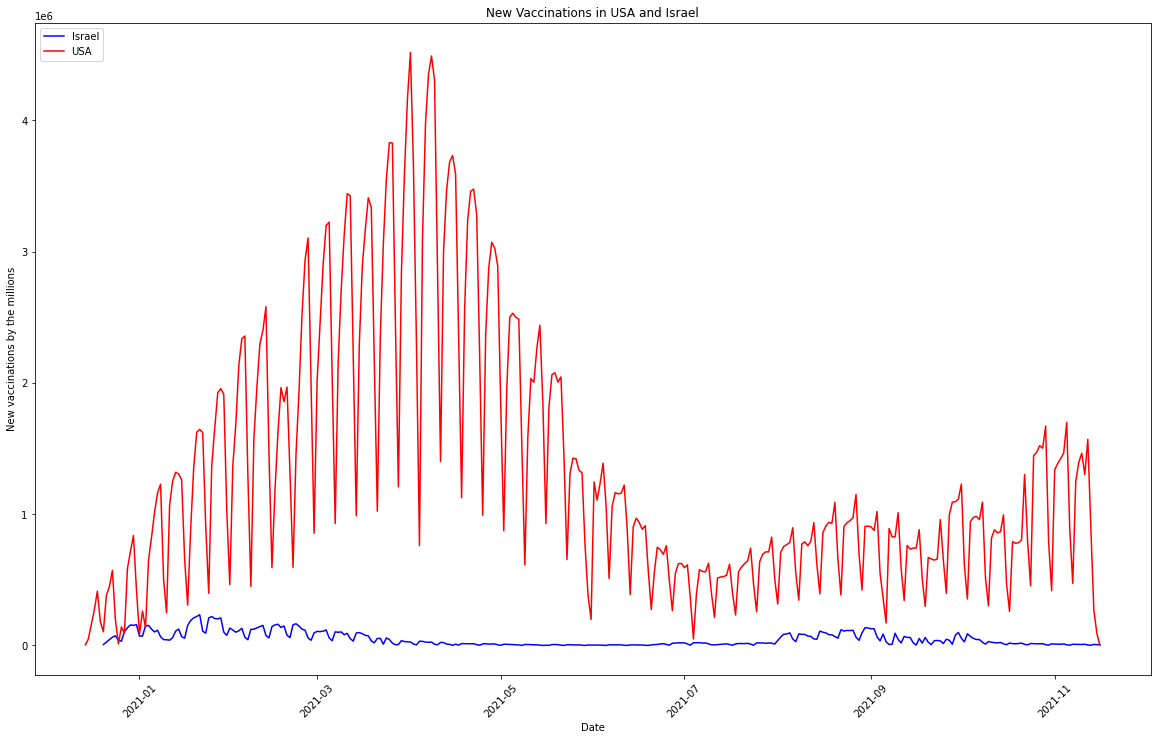

In [108]:
# OK, but let's look at people vaccinated per 100

fig, ax = plt.subplots(figsize=(20, 12))


ax.plot(pd.to_datetime(owid_data_for_israel.date, format='%m/%d/%Y'),
       owid_data_for_israel.new_vaccinations,
       label='Israel',
       color='blue')

ax.plot(pd.to_datetime(owid_data_for_us.date, format='%m/%d/%Y'),
       owid_data_for_us.new_vaccinations,
       label='USA',
       color='red')



# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="New vaccinations by the millions",
       title="New Vaccinations in USA and Israel")

plt.xticks(rotation=45)
plt.legend(loc='upper left')

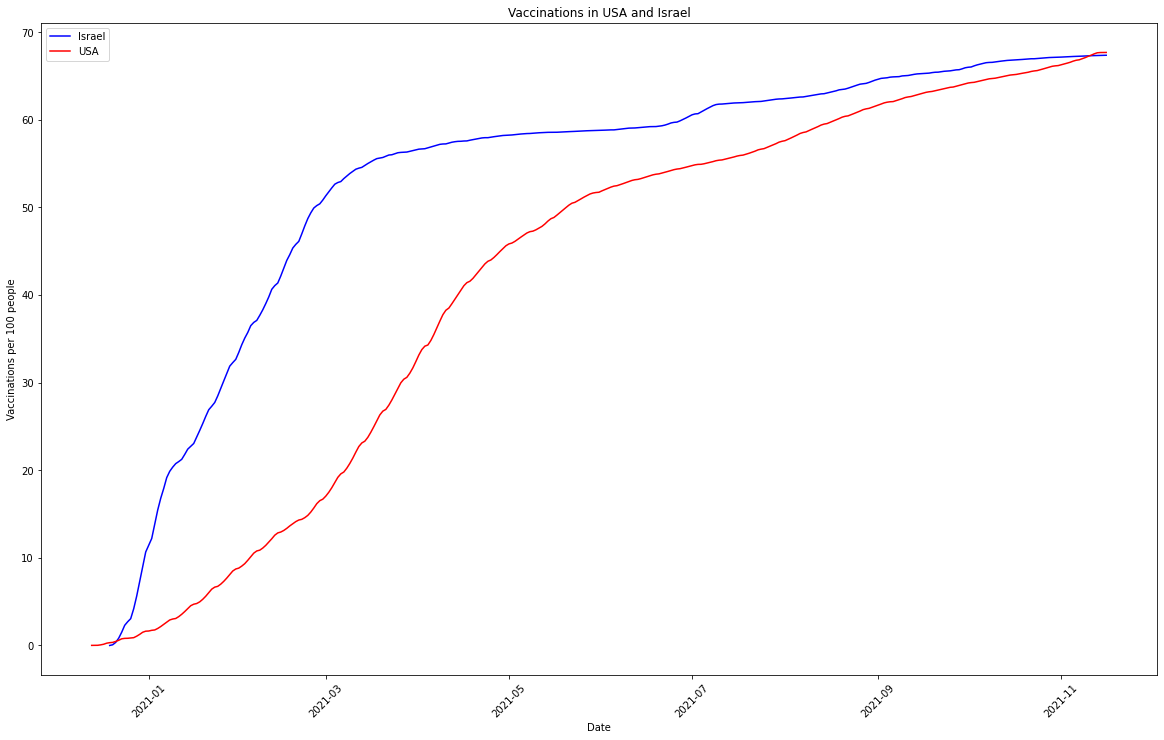

In [109]:
fig, ax = plt.subplots(figsize=(20, 12))


ax.plot(pd.to_datetime(owid_data_for_israel.date, format='%m/%d/%Y'),
       owid_data_for_israel.people_vaccinated_per_hundred,
       label='Israel',
       color='blue')

ax.plot(pd.to_datetime(owid_data_for_us.date, format='%m/%d/%Y'),
       owid_data_for_us.people_vaccinated_per_hundred,
       label='USA',
       color='red')



# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Vaccinations per 100 people",
       title="Vaccinations in USA and Israel")

plt.xticks(rotation=45)
plt.legend(loc='upper left')


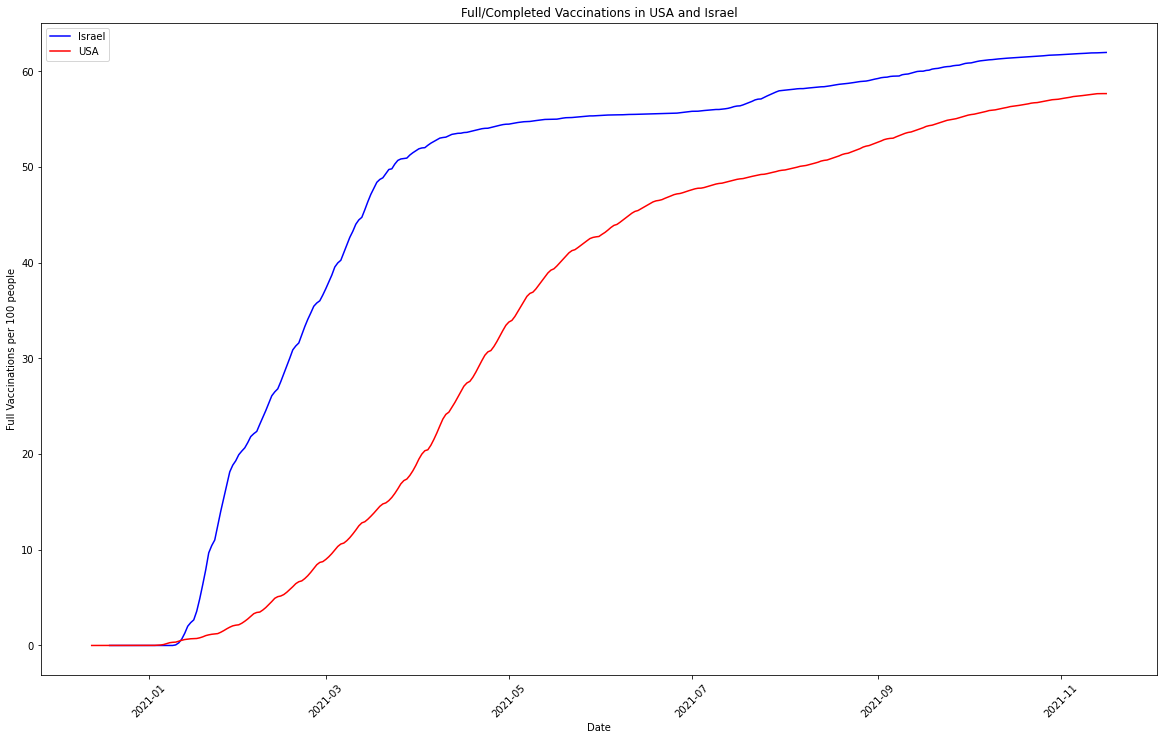

In [110]:
fig, ax = plt.subplots(figsize=(20, 12))


ax.plot(pd.to_datetime(owid_data_for_israel.date, format='%m/%d/%Y'),
       owid_data_for_israel.people_fully_vaccinated_per_hundred,
       label='Israel',
       color='blue')

ax.plot(pd.to_datetime(owid_data_for_us.date, format='%m/%d/%Y'),
       owid_data_for_us.people_fully_vaccinated_per_hundred,
       label='USA',
       color='red')



# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Full Vaccinations per 100 people",
       title="Full/Completed Vaccinations in USA and Israel")

plt.xticks(rotation=45)
plt.legend(loc='upper left')


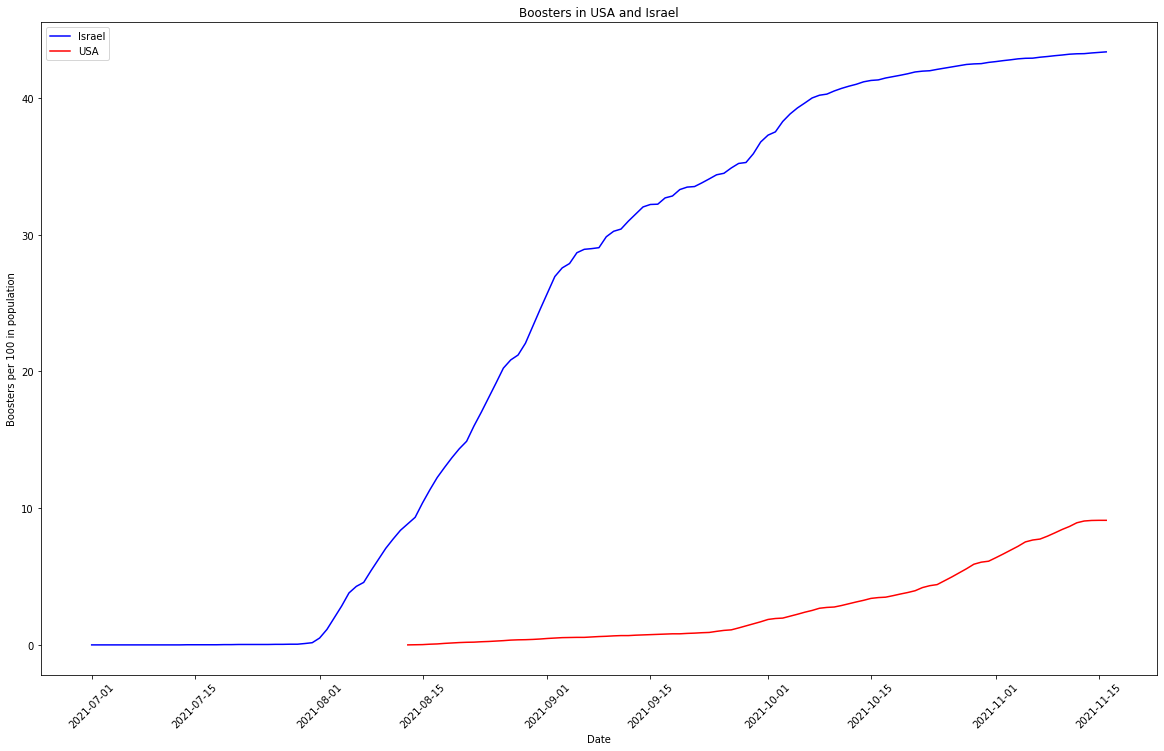

In [103]:
fig, ax = plt.subplots(figsize=(20, 12))


ax.plot(pd.to_datetime(owid_data_for_israel.date, format='%m/%d/%Y'),
       owid_data_for_israel.total_boosters_per_hundred,
       label='Israel',
       color='blue')

ax.plot(pd.to_datetime(owid_data_for_us.date, format='%m/%d/%Y'),
       owid_data_for_us.total_boosters_per_hundred,
       label='USA',
       color='red')



# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Boosters per 100 in population",
       title="Boosters in USA and Israel")

plt.xticks(rotation=45)
plt.legend(loc='upper left')

So we can see a couple things we could have teased out in several different ways. The US is giving a LOT of vaccinations, which it needs with 330 million people, but relative to Israel, many fewer completed sets and far fewer boosters per population amount. These trends need further investigation before we can say much about what it all means. First of all we need to normalize to percentage population, and then look more closely at the elderly. But let's take a speak peak about deaths...

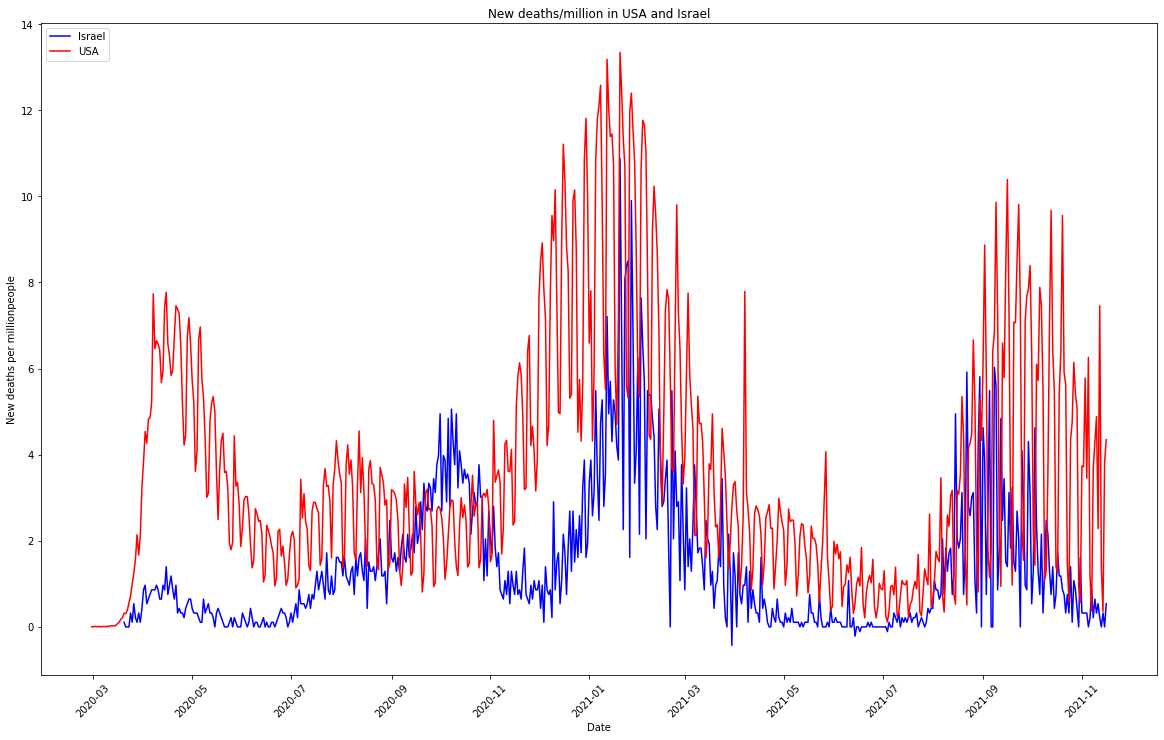

In [111]:
fig, ax = plt.subplots(figsize=(20, 12))


ax.plot(pd.to_datetime(owid_data_for_israel.date, format='%m/%d/%Y'),
       owid_data_for_israel.new_deaths_per_million,
       label='Israel',
       color='blue')

ax.plot(pd.to_datetime(owid_data_for_us.date, format='%m/%d/%Y'),
       owid_data_for_us.new_deaths_per_million,
       label='USA',
       color='red')



# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="New deaths per millionpeople",
       title="New deaths/million in USA and Israel")

plt.xticks(rotation=45)
plt.legend(loc='upper left')


So we see generally the death rate is higher in the US, which the exception of October 2020. The question is- will this grow, and how is it related to the booster?